# Causal Inference in Decision Intelligence – Part 10: Applying Causal Inference for Feature Selection

Link to the article:  [Applying Causal Inference for Feature Selection](https://www.linkedin.com/pulse/causal-inference-decision-intelligence-part-10-feature-zinoviev-naiqc)

## Generate the data

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

In [4]:
# Set the sample size
n = 1000

In [5]:
# Generate normally distributed data 
np.random.seed(22)
I = np.random.randn(n)
U = np.random.randn(n)
R = np.random.randn(n)
X = 1.5 * I + 2.5 * U + np.random.randn(n)
M = 3 * X + np.random.randn(n)
Y = 2 * X + 3.5 * U + 6 * R + 4 * M + np.random.randn(n)
C = 4.5 * X + 5 * Y + np.random.randn(n)
L = 7 * Y + np.random.randn(n)
Z = 20 * U + np.random.randn(n)

In [8]:
# Create a Pandas dataframe
df = pd.DataFrame({"I": I, "U": U, "R": R, "X": X, "M": M, "Y": Y, "C": C, "L": L, "Z": Z})

## Select Features

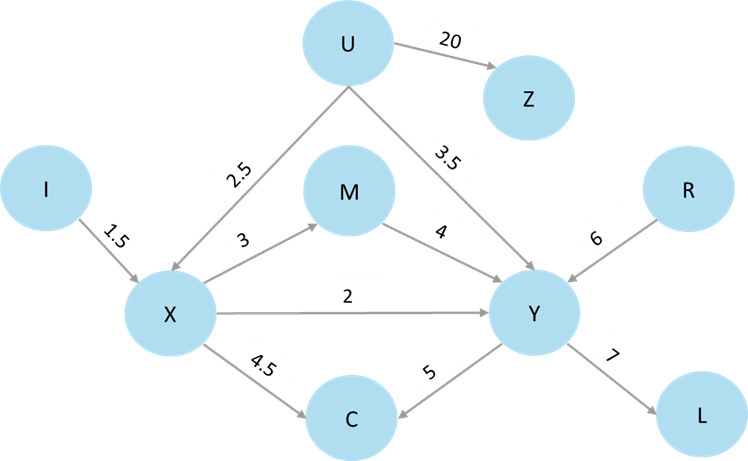

In [11]:
# Regression of Y on X
model1 = smf.ols('Y ~ X', df).fit()
model1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.1698,0.243,-0.699,0.485,-0.647,0.307
X,14.9538,0.079,188.942,0.000,14.798,15.109


The expected coefficient of X is 14 (3*4+2), while the regression one is 14.95 (biased).
We have omitted important variables.

In [12]:
# Regression of Y on X and confounder U
model2 = smf.ols('Y ~ X + U', df).fit()
model2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.0383,0.234,-0.164,0.870,-0.497,0.420
X,14.0317,0.126,111.739,0.000,13.785,14.278
U,3.7493,0.406,9.224,0.000,2.952,4.547


The expected coefficient of X is 14, while the regression one is 14.03 (unbiased).
Confounder U must be included in the model.

In [14]:
# Regression of Y on X and proxy Z   
model4 = smf.ols('Y ~ X + Z ', df).fit()
model4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.0380,0.234,-0.163,0.871,-0.497,0.421
X,14.0350,0.125,111.968,0.000,13.789,14.281
Z,0.1865,0.020,9.218,0.000,0.147,0.226


Variable Z can work as a proxy if confounder U is unknown. The value of X is unbiased when we add Z to the regresion.

In [13]:
# Regression of Y on X, mediator M and confounder U 
model3 = smf.ols('Y ~ X + M + U ', df).fit()
model3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.0280,0.197,-0.142,0.887,-0.415,0.359
X,2.1867,0.597,3.663,0.000,1.015,3.358
M,3.9454,0.196,20.160,0.000,3.561,4.329
U,3.6756,0.343,10.725,0.000,3.003,4.348


The expected coefficient of X is 2, M is 4 and U is 3.5.
The regression coefficients are unbiased.
Confounder U must be included in the model. 
Inclusion of M allows us to estimate the direct effects of X and M.

In [15]:
# Regression of Y on X, mediator M, confounder U and covariate R 
model6 = smf.ols('Y ~ X + M + U + R', df).fit()
model6.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.0225,0.032,-0.704,0.482,-0.085,0.040
X,1.9444,0.097,20.090,0.000,1.754,2.134
M,4.0123,0.032,126.471,0.000,3.950,4.075
U,3.5419,0.056,63.750,0.000,3.433,3.651
R,6.0150,0.031,192.124,0.000,5.954,6.076


All the coefficients are unbiased. Inclusion of a covariate r decreases the standard errors in 3-6 times. It's recommended to include covariates to decrease the standard errors of other coefficients and also increase the predictive power of the model.

In [16]:
# Regression of Y on X, mediator M, confounder U, covariate R and collider C
model7 = smf.ols('Y ~ X + M + U + R + C', df).fit()
model7.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.0156,0.006,-2.445,0.015,-0.028,-0.003
X,-0.8190,0.026,-31.109,0.000,-0.871,-0.767
M,0.1579,0.026,6.143,0.000,0.107,0.208
U,0.1434,0.025,5.826,0.000,0.095,0.192
R,0.2348,0.038,6.197,0.000,0.160,0.309
C,0.1925,0.001,154.696,0.000,0.190,0.195


All the coefficient are biased when we include a collider. The coefficient of X even changed the sign, and the effect of X is negative now. We must not include colliders in the model.

In [17]:
# Regression of Y on X, mediator M, confounder U, covariate R and variable I causing X
model8 = smf.ols('Y ~ X + M + U + R + I', df).fit()
model8.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.0225,0.032,-0.703,0.482,-0.085,0.040
X,1.9603,0.101,19.320,0.000,1.761,2.159
M,4.0117,0.032,126.335,0.000,3.949,4.074
U,3.5059,0.088,39.665,0.000,3.332,3.679
R,6.0151,0.031,192.053,0.000,5.954,6.077
I,-0.0297,0.057,-0.524,0.600,-0.141,0.082


All the coefficients are unbiased when we include variable I. When we include X, including I does not provide additional information but increases the standard error of X.

In [18]:
# Regression of Y on X, mediator M, confounder U, covariate R and variable R caused by Y
model9 = smf.ols('Y ~ X + M + U + R + L', df).fit()
model9.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.0032,0.005,-0.716,0.474,-0.012,0.006
X,0.0628,0.016,3.883,0.000,0.031,0.095
M,0.1069,0.018,5.841,0.000,0.071,0.143
U,0.1009,0.018,5.760,0.000,0.067,0.135
R,0.1601,0.027,5.936,0.000,0.107,0.213
L,0.1389,0.001,220.056,0.000,0.138,0.140


All the coefficients are biased when we include a variable caused by the dependent variable. This variable is highly correlated with Y, but it must never be included in the model. It does not cause Y: It is caused by Y. 

In [19]:
# Simplified approach for predictive models
# Regression of Y on X, mediator M, confounder U, covariate R, variables I and Z
model10 = smf.ols('Y ~ X + M + U + R + I + Z', df).fit()
model10.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.0224,0.032,-0.701,0.484,-0.085,0.040
X,1.9589,0.102,19.289,0.000,1.760,2.158
M,4.0122,0.032,126.219,0.000,3.950,4.075
U,3.2253,0.656,4.917,0.000,1.938,4.512
R,6.0147,0.031,191.853,0.000,5.953,6.076
I,-0.0300,0.057,-0.529,0.597,-0.141,0.081
Z,0.0140,0.032,0.432,0.666,-0.050,0.078


We can exclude variables I and Z from the model, because with high probability they do not cause Y directly.